In [20]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fmin
import emcee
import time

%matplotlib inline


## Problem 2

/Users/Ray/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/Ray/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in log10


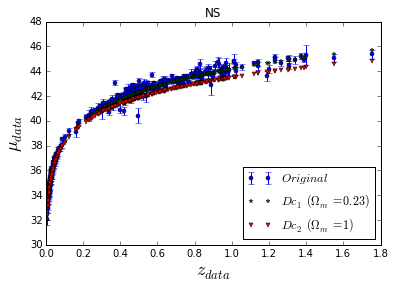

In [21]:
## SN Z mu sigma quality
data = np.loadtxt("SN.dat", usecols = (1,2,3), skiprows = 1, unpack = True)

mu1 = data[1]
z1 = data[0]

##error range
z_up = z1 + data[2]
z_low = z1 - data[2]

plt.figure()
plt.errorbar(z1, mu1, yerr = data[2], fmt ='o', markersize = 4, label = "$Original$")
plt.xlabel("$z_{data}$", size = 18)
plt.ylabel("$\mu_{data}$", size = 18)


def mu(DLs, h):
    return 25 - 5*np.log10(h) + 5*np.log10(DLs)

#####

omega_m1 = 0.23
omega_m2 = 1.
h = 0.7



# E, 1/E in fact
def E(z, omega):
    result = np.sqrt( omega* pow((1+z),3) + (1-omega) )
    return 1./result



############### 
Dc1 = []
for z in z1:
    Dc1 = np.append(Dc1, 3000*quad(E, 0, z, args = (omega_m1))[0])
Dc2 = []
for z in z1:
    Dc2 = np.append(Dc2, 3000*quad(E, 0, z, args = (omega_m2))[0])

    
# error DC    
Dc1_low = []
for z in z_low:
    Dc1_low = np.append(Dc1_low, 3000*quad(E, 0, z, args = (omega_m1))[0])
Dc1_up = []
for z in z_up:
    Dc1_up = np.append(Dc1_up, 3000*quad(E, 0, z, args = (omega_m1))[0])

Dc2_low = []
for z in z_low:
    Dc2_low = np.append(Dc2_low, 3000*quad(E, 0, z, args = (omega_m2))[0])
Dc2_up = []
for z in z_up:
    Dc2_up = np.append(Dc2_up, 3000*quad(E, 0, z, args = (omega_m2))[0])




# DL
DL1 = Dc1*(1+z1)
DL2 = Dc2*(1+z1)

DL1_error = [(1 + z_low)*Dc1_low , (1 + z_up)*Dc1_up]
DL2_error = [(1 + z_low)*Dc2_low , (1 + z_up)*Dc2_up]



# Mu
MU1 = mu(DL1, 0.7)
MU2 = mu(DL2, 0.7)

MU1_error = mu(DL1_error, 0.7)


plt.errorbar(z1,MU1, fmt="o",  label="$Dc_1\,(\Omega_m=0.23)$", markersize = 4, marker='*')
plt.errorbar(z1,MU2, fmt="o", label="$Dc_2\,(\Omega_m=1)$", markersize = 4, marker = 'v')
plt.title("NS")

plt.legend(loc = 4)
#plt.savefig("NS_data.pdf")


## Problem 3 

Optimization terminated successfully.
         Current function value: 393.490325
         Iterations: 30
         Function evaluations: 57
omega_opt h_opt chi2(param0)
0.318307799203 0.630513438562 616.299117897
0.909921 seconds


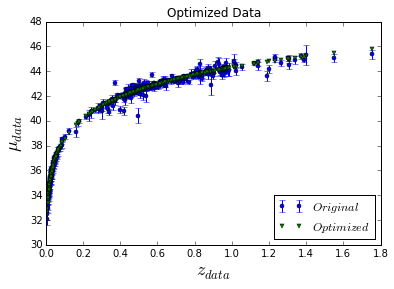

In [22]:


## check with data
## SN Z mu sigma quality
data = np.loadtxt("SN.dat", usecols = (1,2,3), skiprows = 1, unpack = True)
mu1 = data[1]
z1 = data[0]
sigma1 = data[2]

## redefine mu function with z
def MU(z_array, omega_m, h):
    Dc=[]
    for zi in z_array:
        Dc = np.append(Dc, quad(E, 0, zi, args=(omega_m))[0])  
    DLs = (1+z_array)*Dc*3000
    result = 25 - 5*np.log10(h) + 5*np.log10(DLs)
    return result

## sum of array: np.sum
def chi2(param):
    omega_m, h = param
    result_array = ( mu1 - MU(z1, omega_m, h) )**2 / sigma1**2
    result = np.sum(result_array)
    return result

## TRY
start_time = time.clock()

omega0 = 0.27
h0 = 0.7
param0 = [omega0, h0]
omega_opt, h_opt = fmin(chi2, param0)

print 'omega_opt', 'h_opt', 'chi2(param0)'
print omega_opt, h_opt, chi2(param0)

print time.clock() - start_time, "seconds"



## Plot
plt.figure()
plt.errorbar(z1, mu1, yerr = data[2], fmt ='o', markersize = 4, label = "$Original$")
plt.errorbar(z1, MU(z1, omega_opt, h_opt), fmt="o", markersize=4, marker="v", label = "$Optimized$")
plt.xlabel("$z_{data}$", size = 18)
plt.ylabel("$\mu_{data}$", size = 18)
plt.title("Optimized Data")

plt.legend(loc = 4)
plt.yscale("linear")

## Problem 4

m b f
-0.9594 4.294 0.534
   status: 0
  success: True
     njev: 12
     nfev: 60
 hess_inv: array([[ 0.00482743, -0.02148773,  0.00516933],
       [-0.02148773,  0.1043033 , -0.02324966],
       [ 0.00516933, -0.02324966,  0.01813345]])
      fun: 32.121525025492275
        x: array([-0.9309478 ,  4.13519791, -0.72650156])
  message: 'Optimization terminated successfully.'
      jac: array([  1.90734863e-06,   9.53674316e-07,   0.00000000e+00])
(0, 3)


AssertionError: I don't believe that you want more dimensions than samples!

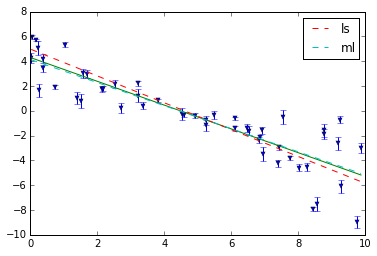

In [78]:
## emcee 

import numpy as np

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534
print "m", "b", "f"
print m_true, b_true, f_true
# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.figure()
plt.errorbar(x,y,yerr, fmt="v",markersize=4)
plt.plot(x,m_true*x+b_true)

## Linear Least Square
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))
plt.errorbar(x,m_ls*x+b_ls, fmt="--", label="ls")
## Maximum Likelihood Estimation

# Use log of f
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

# Optimize lnlike, minimize -lnlike, maximize likelihood
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)

# op.minimize(f, x0), x0 initial guess
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]
print result
plt.errorbar(x,m_ml*x+b_ml, fmt="--",label = "ml")

plt.legend(loc = 1)






## Marginalization & uncertainty estimation
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf
# try, inf = infinity
theta = (-15,-14,-16)

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)









ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
#print sampler.chain[0]








print np.shape(samples)

samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
                    truths=[m_true, b_true, np.log(f_true)])
fig.savefig("triangle.png")

##### Error

import matplotlib.pyplot as pl
xl = np.array([0, 10])
for m, b, lnf in samples[np.random.randint(len(samples), size=100)]:
    pl.plot(xl, m*xl+b, color="k", alpha=0.1)
pl.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
pl.errorbar(x, y, yerr=yerr, fmt=".k")




-inf